In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

df = pd.read_csv('/Users/ljuae/Desktop/윤서/python/Iris.csv')

# 문제 2: 데이터 구경하기
print("총 데이터 개수:", df.shape[0])
print("총 정보(열) 개수:", df.shape[1])

# 문제 3: 각 열의 이름 확인하기
print("열 이름:", df.columns.tolist())

총 데이터 개수: 150
총 정보(열) 개수: 6
열 이름: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [3]:
# 문제 4: 기본 정보 확인하기
print("결측치 개수:\n", df.isnull().sum())
numeric_cols = df.select_dtypes(include='number').columns
print("숫자 열 개수:", len(numeric_cols))

# 문제 5: 간단한 계산
print("꽃받침 길이 평균:", df['SepalLengthCm'].mean())
print("꽃잎 너비 최댓값:", df['PetalWidthCm'].max())

결측치 개수:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
숫자 열 개수: 5
꽃받침 길이 평균: 5.843333333333334
꽃잎 너비 최댓값: 2.5


In [4]:
# 문제 6: 붓꽃 종류별 개수
species_counts = df['Species'].value_counts()
print("종별 개수:\n", species_counts)
print("종 수 같음 여부:", species_counts.nunique() == 1)

# 문제 7: 특정 조건 찾기
print("꽃잎 길이 > 2.0 개수:", df[df['PetalLengthCm'] > 2.0].shape[0])
print("꽃받침 너비 > 3.5 개수:\n", df[df['SepalWidthCm'] > 3.5])

종별 개수:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
종 수 같음 여부: True
꽃잎 길이 > 2.0 개수: 100
꽃받침 너비 > 3.5 개수:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
10    11            5.4           3.7            1.5           0.2   
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
16    17            5.4           3.9            1.3           0.4   
18    19            5.7           3.8            1.7           0.3   
19    20            5.1           3.8            1.5           0.3   
21    22            5.1           3.7            1.5           0.4   
22    23            4.6           3.6            1.0           0.2   
32    33            5.2           4.1            1.5           0.1  

버시컬러 평균 꽃잎 길이: 4.26
버지니카 최대 꽃받침 너비: 3.8


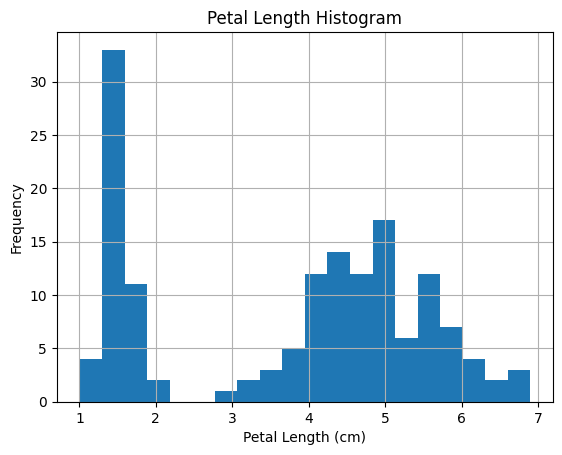

In [5]:
# 문제 8: 특정 종류만 보기
versicolor_mean_petal_len = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'].mean()
virginica_max_sepal_width = df[df['Species'] == 'Iris-virginica']['SepalWidthCm'].max()
print("버시컬러 평균 꽃잎 길이:", versicolor_mean_petal_len)
print("버지니카 최대 꽃받침 너비:", virginica_max_sepal_width)

# 문제 9: 히스토그램
df['PetalLengthCm'].hist(bins=20)
plt.title('Petal Length Histogram')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

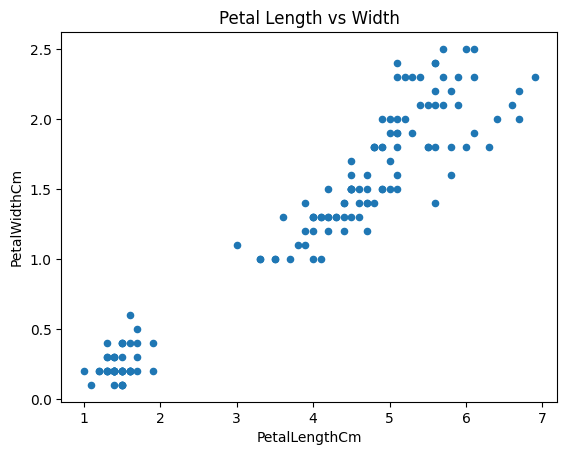

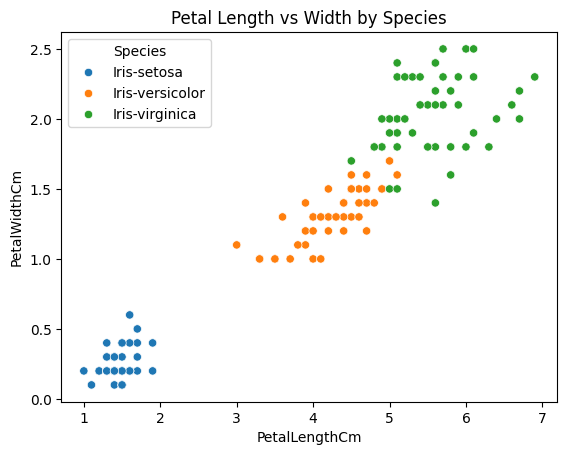

In [6]:
# 문제 10: 산점도
df.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm')
plt.title('Petal Length vs Width')
plt.show()

# 문제 11: 종류별 산점도
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Petal Length vs Width by Species')
plt.show()

종류별 평균:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


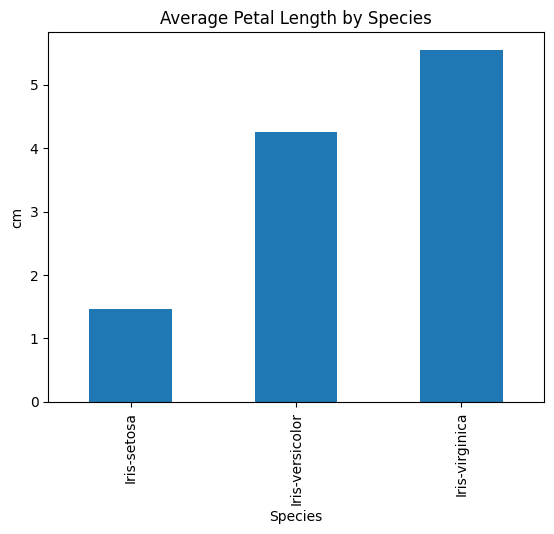

가장 차이 큰 측정값: Id - 100.0


In [8]:
# 문제 12: 종류별 평균 비교
grouped_means = df.groupby('Species').mean(numeric_only=True)
print("종류별 평균:\n", grouped_means)

# 문제 13: 막대그래프
grouped_means['PetalLengthCm'].plot(kind='bar')
plt.title('Average Petal Length by Species')
plt.ylabel('cm')
plt.show()

diffs = grouped_means.max() - grouped_means.min()
print("가장 차이 큰 측정값:", diffs.idxmax(), "-", diffs.max())

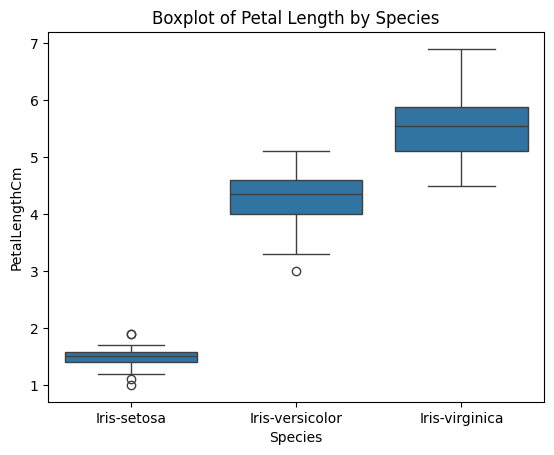

꽃받침 면적 평균:
 Species
Iris-setosa        17.2088
Iris-versicolor    16.5262
Iris-virginica     19.6846
Name: SepalArea, dtype: float64
꽃잎 면적 평균:
 Species
Iris-setosa         0.3628
Iris-versicolor     5.7204
Iris-virginica     11.2962
Name: PetalArea, dtype: float64


In [9]:
# 문제 14: 박스플롯
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Boxplot of Petal Length by Species')
plt.show()

# 문제 15: 새로운 값 계산
df['SepalArea'] = df['SepalLengthCm'] * df['SepalWidthCm']
df['PetalArea'] = df['PetalLengthCm'] * df['PetalWidthCm']
area_means = df.groupby('Species')[['SepalArea', 'PetalArea']].mean()
print("꽃받침 면적 평균:\n", area_means['SepalArea'])
print("꽃잎 면적 평균:\n", area_means['PetalArea'])

In [10]:
# 문제 16: 필터링
filtered_df = df[(df['SepalWidthCm'] >= 3.0) & (df['PetalWidthCm'] >= 1.5)]
print("필터링된 데이터 개수:", filtered_df.shape[0])
print("해당 데이터의 종류 분포:\n", filtered_df['Species'].value_counts())

# 문제 17: 순위 매기기
df['PetalLengthRank'] = df['PetalLengthCm'].rank(ascending=False)
top10 = df.nsmallest(10, 'PetalLengthRank')
top10_species_counts = top10['Species'].value_counts()
print("Top 10 안에 가장 많이 포함된 종류:", top10_species_counts.idxmax())
print("가장 적게 포함된 종류:", top10_species_counts.idxmin())

필터링된 데이터 개수: 39
해당 데이터의 종류 분포:
 Species
Iris-virginica     29
Iris-versicolor    10
Name: count, dtype: int64
Top 10 안에 가장 많이 포함된 종류: Iris-virginica
가장 적게 포함된 종류: Iris-virginica
